In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [28]:
# parameter setting
amp = 1    # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [29]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [30]:
# generate phase
theta = t * 2*np.pi * freq

In [31]:
# generate signal by cosine-phasor
s = np.sin(theta)

In [32]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

In [33]:
# !pip install sounddevice # numpy와 반대로 유명하지 않은 library이기 때문에 깔아주어야함  
import sounddevice as sd
sd.play(c.real, sr)  

In [34]:
s = amp*np.sin(theta)

Text(0, 0.5, 'real')

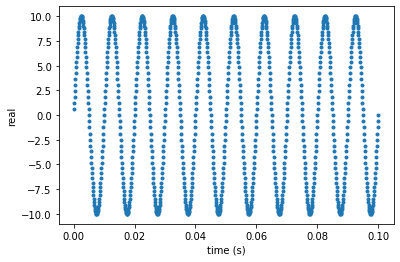

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [36]:
c = amp*np.exp(theta*1)

Text(0.5, 0, 'imag')

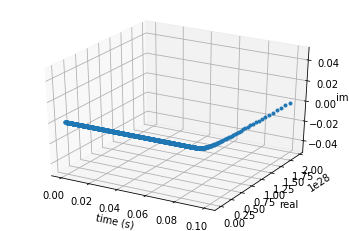

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')  

In [ ]:
# 가장 낮은 f0를 정하고 sine wave를 만들어서 더하기
# sr이 100hz라고 했을 때, 표현할 수 있는 숫자의 갯수가 1초에 100개라는 말과 동일 - 1hz의 frequency를 표현할 수 있음 / 2hz도 가능 ... 10000hz의 경우 주어진 숫자 100개로 10000번 왔다갔다 할 수는 없음
#sr이 1초에 충분히 있어야 그만큼의 숫자를 표현할 수 있음

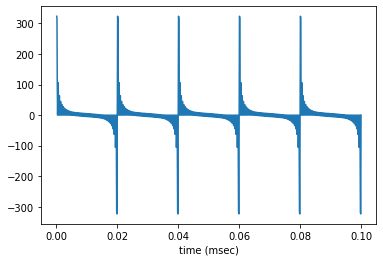

In [39]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));  # Fend : 가장 마지막 f # sr/2 : Niquist Frequency #t를 만들었다고 assume한 상태 #;time 벡터의 갯수만큼 0을 만듦
for freq in range(F0, Fend+1, F0): # increament : f0 만큼 -> 100만큼 # Fend+1은 가장 마지막 것을 포함시키기 위해서
    theta = t * 2*np.pi * freq 
    
    s = s + amp * np.sin(theta) #가장 처음 s이 정의되어 있지 않기 때문에 error가 뜰 수 있음 #첫째줄에서 가장 초기의 s값 정의
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); # 다 더해진 상태의 s를 y축의 값으로 plot
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr) 
#pulse train : 선 하나와 000..의 연속